<a href="https://colab.research.google.com/github/Vlasovets/speech_recognition/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import os

from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder

In [0]:
train = pd.read_csv('csv_train.csv', sep=',')
header = np.arange(0, 6374)
train.columns = header

#target vector
y_train = train[6373]

# train subset
train = train.iloc[:, :-1]

In [0]:
dev = pd.read_csv('csv_dev.csv', sep=',')
dev.columns = header

#target vector
y_dev = dev[6373]

# train subset
dev = dev.iloc[:, :-1]

In [0]:
test = pd.read_csv('csv_test.csv', sep=',')
header = np.arange(0, 6374)
test.columns = header

y_test = test[6373]
y_test.head(2)

test = test.iloc[:, :-1]

In [0]:
train_outcome = pd.crosstab(index=y_train,  # Make a crosstab
                              columns="count")      # Name the count column

In [6]:
train_outcome # every language has identical number of samples

col_0,count
6373,
ARA,300
CHI,300
FRE,300
GER,300
HIN,300
ITA,300
JPN,299
KOR,300
SPA,300


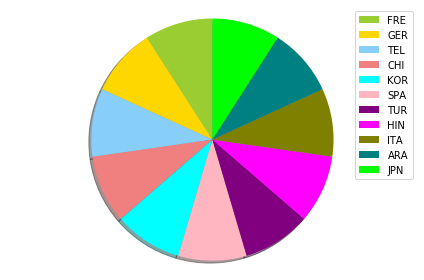

In [7]:
# Visualizing Language Distribution 
temp = y_train.value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink',
          'purple', 'magenta', 'olive', 'teal', 'lime']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

### One-hot encoding

In [0]:
# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(y_train)
Y_train = encoder.transform(y_train)

# encoding test labels 
encoder.fit(y_test)
Y_test = encoder.transform(y_test)

In [9]:
# Dimension of Train and Test set 
print("Dimension of Train set", train.shape)
print("Dimension of Test set", dev.shape,"\n")

Dimension of Train set (3299, 6373)
Dimension of Test set (964, 6373) 



In [0]:
# Scaling the Train and Dev feature set 
#scaling is transforming the values to a specific scale, e.g. from 1 to 10
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
dev_scaled = scaler.transform(dev)
test_scaled = scaler.transform(test)

## Greed search among parameters in SVM

In [12]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

params_grid

[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 {'C': [1, 10, 100, 1000], 'kernel': ['linear']}]

In [0]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(train_scaled, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(dev_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

Best score for training data: 0.4355865413761746 

Best C: 10 

Best Kernel: rbf 

Best Gamma: 0.0001 



New Greed Search among parameters in SVM

In [13]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                    {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

params_grid

[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
  'gamma': [0.001, 0.0001],
  'kernel': ['rbf']},
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']}]

In [14]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(train_scaled, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

Best score for training data: 0.4355865413761746 

Best C: 10 

Best Kernel: rbf 

Best Gamma: 0.0001 

